<a href="https://colab.research.google.com/github/yahya05/Sales_analysis/blob/main/Sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/dataset"

Sales_April_2019.csv	 Sales_January_2019.csv  Sales_May_2019.csv
Sales_August_2019.csv	 Sales_July_2019.csv	 Sales_November_2019.csv
Sales_December_2019.csv  Sales_June_2019.csv	 Sales_October_2019.csv
Sales_February_2019.csv  Sales_March_2019.csv	 Sales_September_2019.csv


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter



Merge data from each month into one CSV

In [ ]:
path = "/content/drive/MyDrive/dataset"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data.csv", index=False)

Read in updated dataframe

In [ ]:
df=pd.read_csv("all_data.csv")
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [ ]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [ ]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

Data cleaning

Drop rows of NAN

In [ ]:
nan_df = df[df.isna().any(axis=1)]
display(nan_df.head())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1047,NaN,NaN,NaN,NaN,NaN,NaN
1542,NaN,NaN,NaN,NaN,NaN,NaN
1653,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN
2043,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#df=df[df.index!=nan_df.index]
df = df.dropna(how='all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


Extract month from date column

In [ ]:
df['Month']=df['Order Date'].str[0:2]
display(df)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


Get rid of text in order date column

In [ ]:
df=df[df['Month']!='Or']
df['Month']=pd.to_numeric(df['Month'])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",3
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3


In [ ]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int64
dtype: object

Create sales column

In [ ]:
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'])
df['Price Each']=pd.to_numeric(df['Price Each'])
df['Sales']=df['Price Each']*df['Quantity Ordered']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,14.95
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,23.98
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3,99.99
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3,379.99


Extract city from adress

In [ ]:
df['City']=df['Purchase Address'].apply(lambda x :  x.split(',')[1].strip(" ")+" ("+x.split(',')[2].split(" ")[1]+")")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00,Austin (TX)
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,14.95,Austin (TX)
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,23.98,Austin (TX)
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco (CA)
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco (CA)


Extract hour from order_date column

In [ ]:
df['Hour']=pd.to_datetime(df['Order Date']).dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00,Austin (TX),20
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,14.95,Austin (TX),20
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,23.98,Austin (TX),20
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco (CA),5
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco (CA),0


Data Exploration

Which month had the best sells and max orders ?

In [ ]:
sales=df.groupby('Month').sum()
sales.head()

,Quantity Ordered,Price Each,Sales,Hour
Month,,,,
1,10903,1.811768e+06,1.822257e+06,139485
2,13449,2.188885e+06,2.202022e+06,172669
3,17005,2.791208e+06,2.807100e+06,218969
4,20558,3.367671e+06,3.390670e+06,262259
5,18667,3.135125e+06,3.152607e+06,238780


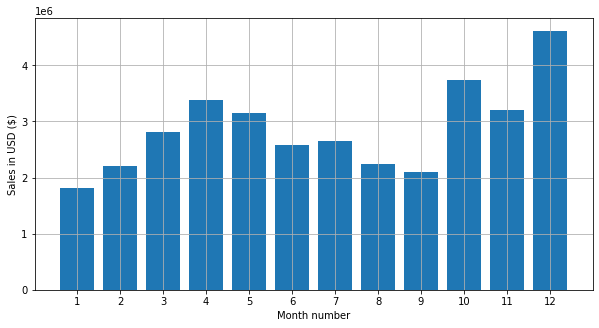

In [ ]:
months=range(1,13)
plt.figure(figsize=(10,5))
plt.bar(months,sales.Sales)
plt.xticks(months)
plt.grid()
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')

plt.show()

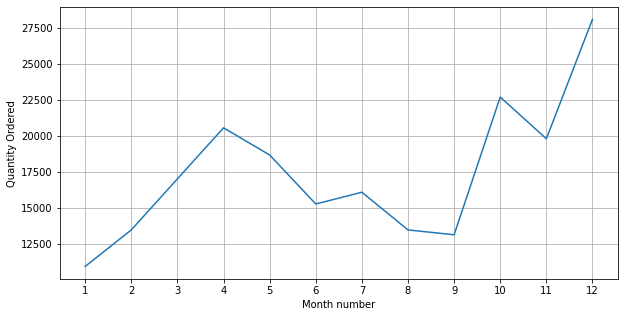

In [ ]:
months=range(1,13)
plt.figure(figsize=(10,5))
plt.plot(months,sales['Quantity Ordered'])
plt.xticks(months)
plt.grid()
plt.ylabel('Quantity Ordered')
plt.xlabel('Month number')

plt.show()

Which city had the best sells ?

In [ ]:
sales_city=df.groupby('City').sum()
sales_city.head()


,Quantity Ordered,Price Each,Month,Sales,Hour
City,,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06,214264
Austin (TX),11153,1.809874e+06,69829,1.819582e+06,141946
Boston (MA),22528,3.637410e+06,141112,3.661642e+06,288225
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06,214390
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06,427444


Text(0.5, 0, 'City')

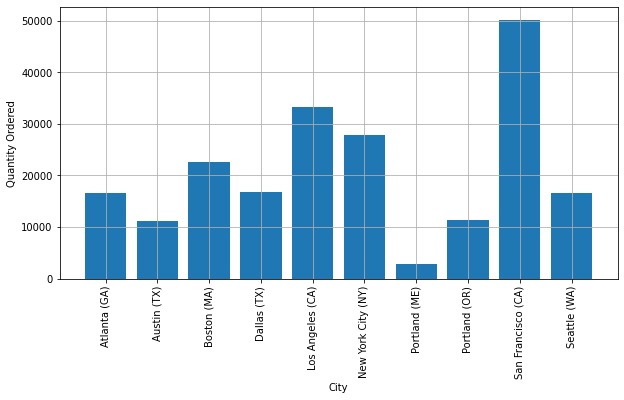

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(sales_city.index,sales_city['Quantity Ordered'])
plt.xticks(sales_city.index,rotation="vertical")
plt.grid()
plt.ylabel('Quantity Ordered')
plt.xlabel('City')

Text(0.5, 0, 'City')

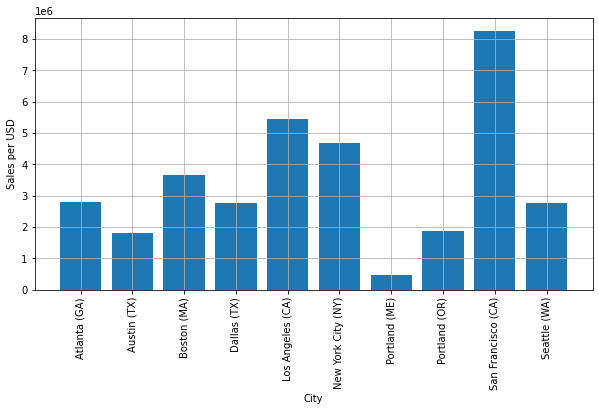

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(sales_city.index,sales_city['Sales'])
plt.xticks(sales_city.index,rotation="vertical")
plt.grid()
plt.ylabel('Sales per USD')
plt.xlabel('City')

Which hour should we maximize adds ?

In [ ]:
sales_hr=df.groupby('Hour').sum()
sales_hr.head()

,Quantity Ordered,Price Each,Month,Sales
Hour,,,,
0,4428,709296.70,27554,713721.27
1,2619,458490.00,16657,460866.88
2,1398,233833.64,8507,234851.44
3,928,144726.42,5904,145757.89
4,937,162058.18,6148,162661.01


Text(0.5, 0, 'Hours')

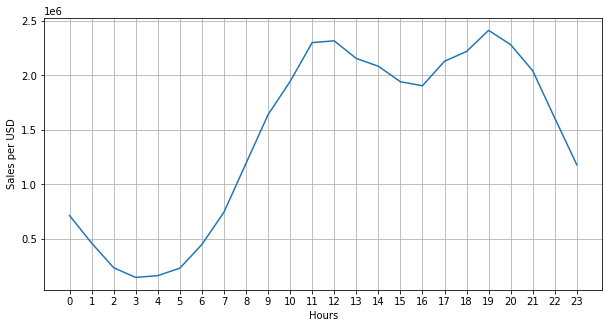

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(sales_hr.index,sales_hr['Sales'])
plt.xticks(sales_hr.index)
plt.grid()
plt.ylabel('Sales per USD')
plt.xlabel('Hours')

Products most sells

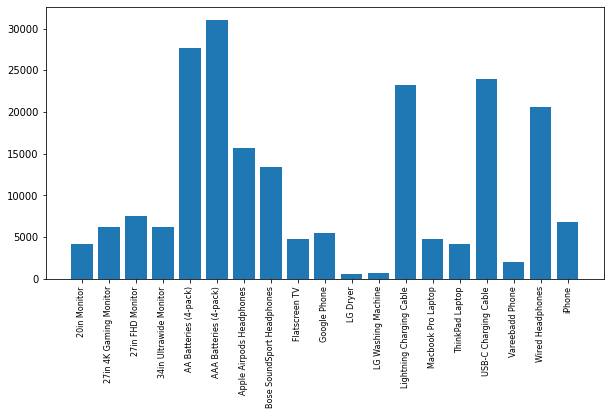

In [ ]:
plt.figure(figsize=(10,5))
sales_product = df.groupby('Product').sum()
plt.bar(sales_product.index,sales_product['Quantity Ordered'] )
plt.xticks(sales_product.index, rotation='vertical', size=8)
plt.show()

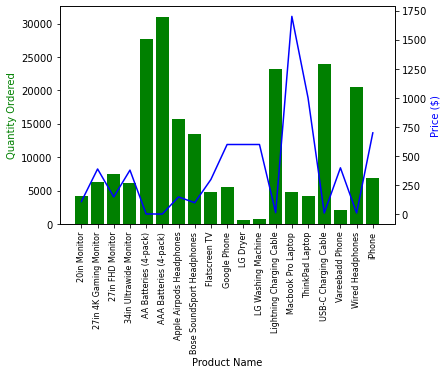

In [ ]:
prices = df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(sales_product.index, sales_product['Quantity Ordered'], color='g')
ax2.plot(prices.index, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(prices.index, rotation='vertical', size=8)

fig.show()

 What products are most often sold together?

In [ ]:
Orders= df[df['Order ID'].duplicated(keep=False)]
Orders.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00,Austin (TX),20
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,14.95,Austin (TX),20
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,23.98,Austin (TX),20
30,162037,iPhone,1,700.00,03/23/19 02:11,"277 Elm St, Los Angeles, CA 90001",3,700.00,Los Angeles (CA),2
31,162037,Lightning Charging Cable,1,14.95,03/23/19 02:11,"277 Elm St, Los Angeles, CA 90001",3,14.95,Los Angeles (CA),2


In [ ]:
Orders['Items'] = Orders.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
Comm = Orders[['Order ID', 'Items']].drop_duplicates()
Comm.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Items
0,162009,"iPhone,Lightning Charging Cable,Wired Headphones"
30,162037,"iPhone,Lightning Charging Cable"
60,162066,"AA Batteries (4-pack),USB-C Charging Cable"
66,162071,"Vareebadd Phone,USB-C Charging Cable"
78,162082,"Vareebadd Phone,Wired Headphones"


In [ ]:
count = Counter()
keys=[]
values=[]
for row in Comm['Items']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)
    keys.append(key)
    values.append(key)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
